Can we use a larger foundation model to label images automatically?

Follow principles from [autodistill](https://docs.autodistill.com/) - use large model to label images to train smaller model

# Yolo World: Prompt + Image = Labelled image

In [7]:
from ultralytics import YOLOWorld

small = "yolov8s-world.pt"
medium = "yolov8m-world.pt"
large = "yolov8l-world.pt"
model = YOLOWorld("yolov8l-world.pt")

100%|██████████| 91.2M/91.2M [00:05<00:00, 16.8MB/s]


In [53]:
import cv2
import IPython
# Define custom classes
model.set_classes(["rice", "chicken", "veg"])

# Execute prediction for specified categories on an image
results = model.predict('./food-pics/WhatsApp Image 2024-02-19 at 21.48.01 (1).jpeg')


image 1/1 /Users/ismailmohammed/repos/auto-food-diary/notebooks/food-pics/WhatsApp Image 2024-02-19 at 21.48.01 (1).jpeg: 640x384 1 rice, 304.1ms
Speed: 1.8ms preprocess, 304.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
def display_model_pred(result):
    _,ret = cv2.imencode('.jpg',result.plot()) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [11]:
display_model_pred(results[0])

NameError: name 'results' is not defined

Labelling might be asking too much - can we just create bounding boxes instead?

# Segment Anything Model (SAM)

In [ ]:
from ultralytics import SAM

model = SAM()
res = model("./food-pics/1.jpeg")
display_model_pred(res[0])

100%|██████████| 358M/358M [00:22<00:00, 16.9MB/s] 


100%|██████████| 6.73M/6.73M [00:00<00:00, 15.8MB/s]



image 1/1 /Users/ismailmohammed/repos/auto-food-diary/notebooks/food-pics/1.jpeg: 384x640 1 fork, 2 spoons, 1 bowl, 2 bananas, 85.6ms
Speed: 2.8ms preprocess, 85.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


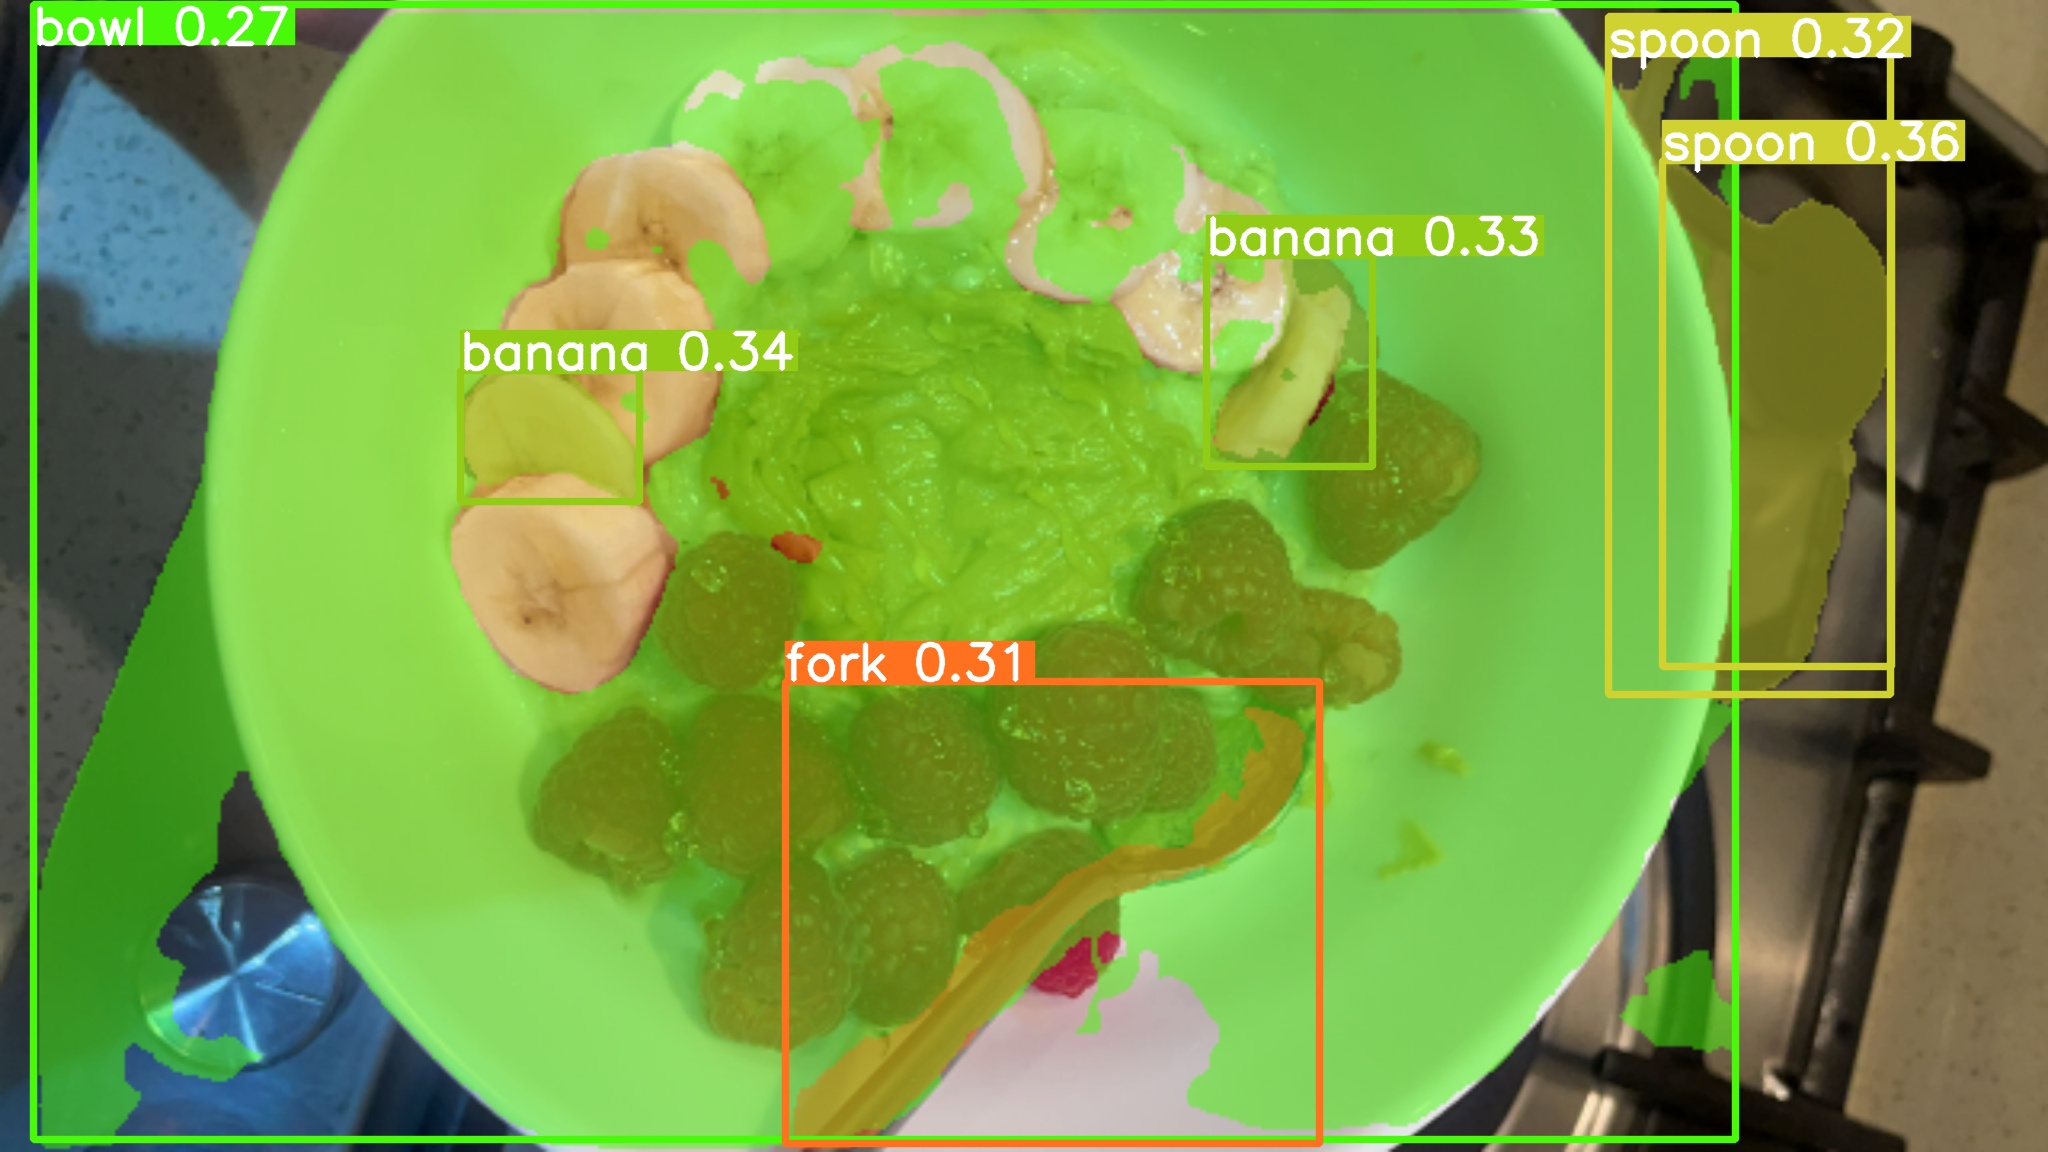

In [15]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt')
res = model("./food-pics/1.jpeg")
display_model_pred(res[0])

100%|██████████| 22.8M/22.8M [00:01<00:00, 16.3MB/s]



image 1/1 /Users/ismailmohammed/repos/auto-food-diary/notebooks/food-pics/1.jpeg: 384x640 2 spoons, 1 bowl, 4 bananas, 136.1ms
Speed: 1.8ms preprocess, 136.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


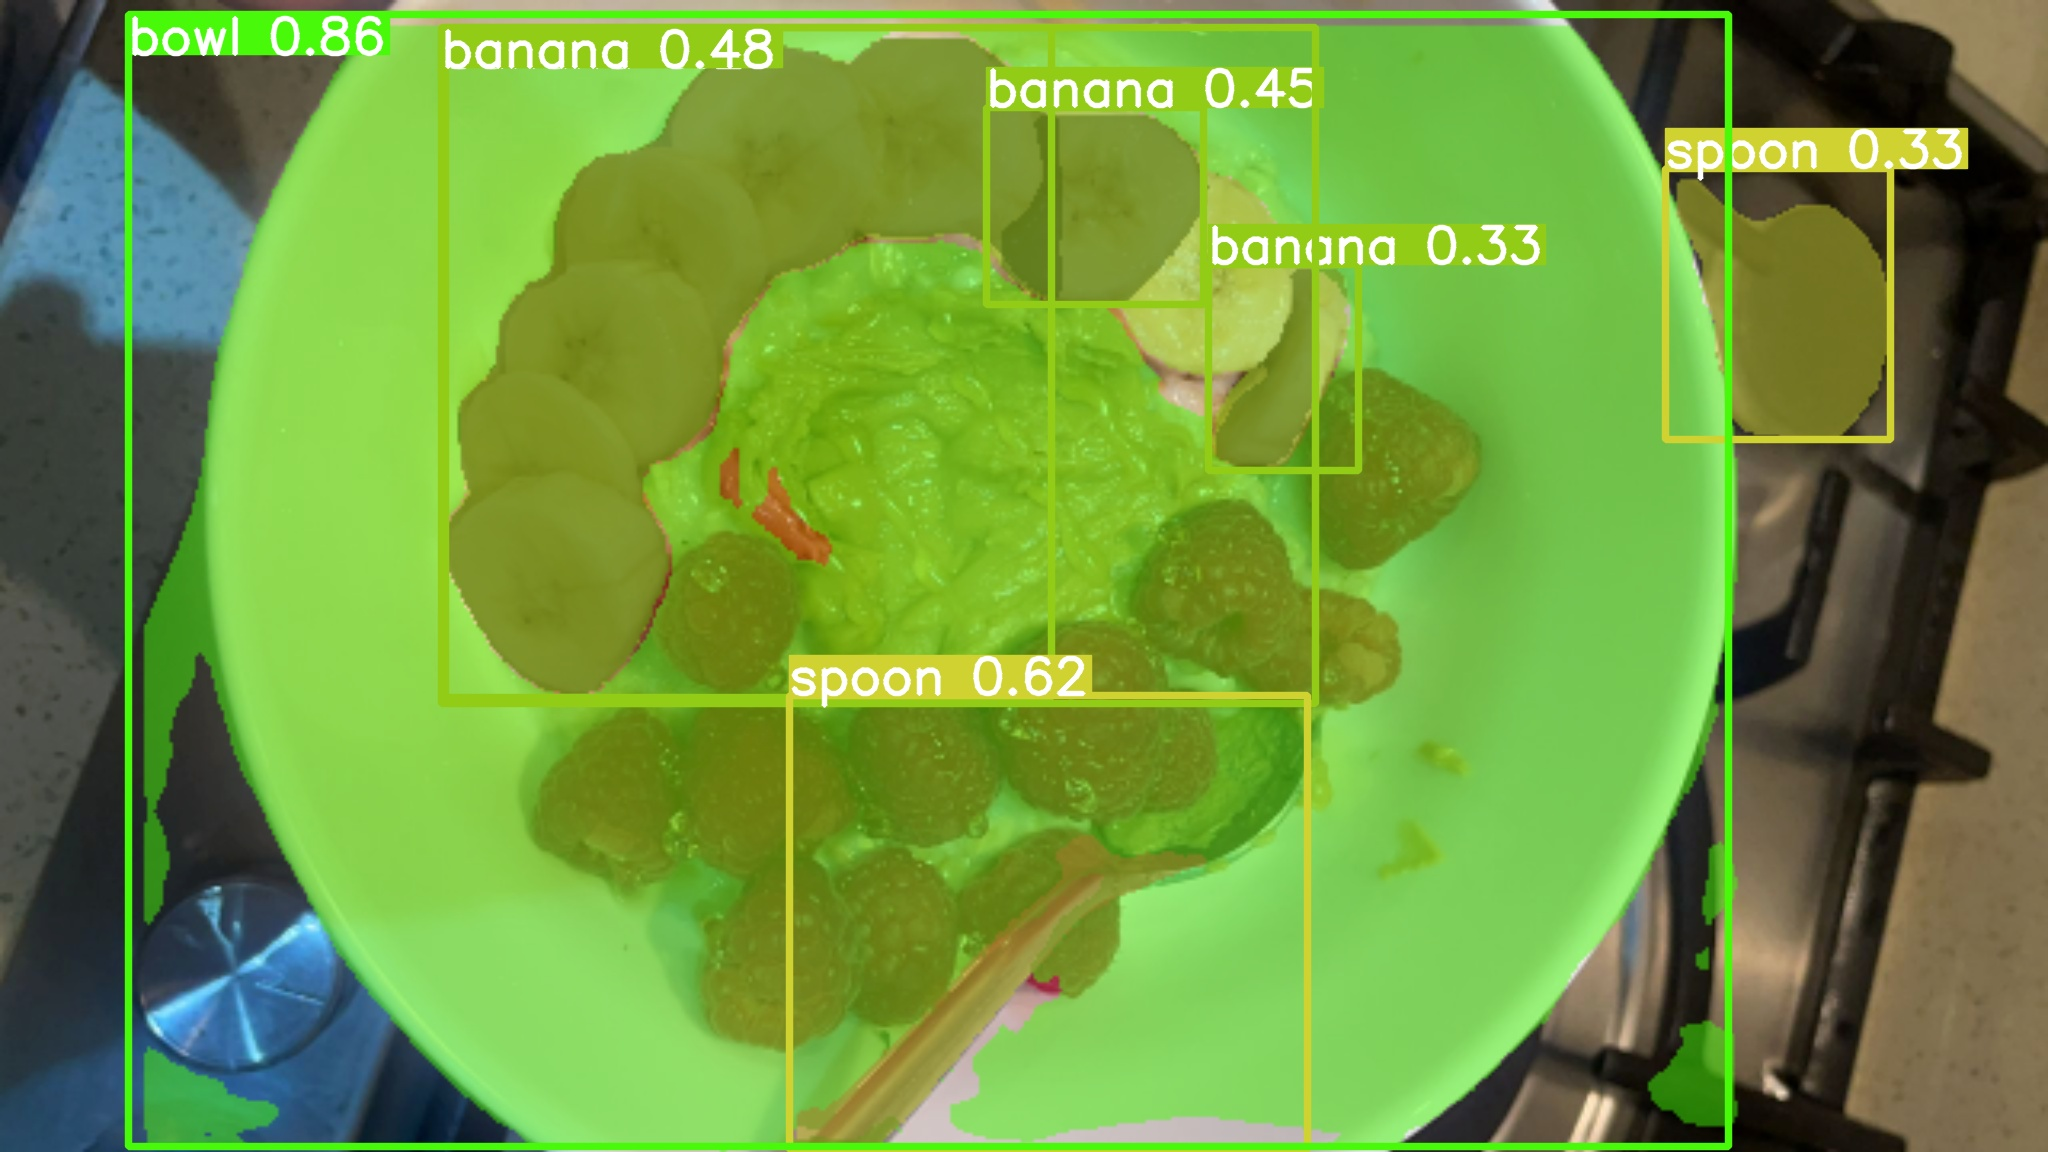

In [18]:
model = YOLO('yolov8s-seg.pt')
res = model("./food-pics/1.jpeg")
display_model_pred(res[0])

100%|██████████| 22.7M/22.7M [00:01<00:00, 16.5MB/s]



image 1/1 /Users/ismailmohammed/repos/auto-food-diary/notebooks/food-pics/1.jpeg: 384x640 78 objects, 146.7ms
Speed: 1.2ms preprocess, 146.7ms inference, 20.8ms postprocess per image at shape (1, 3, 384, 640)


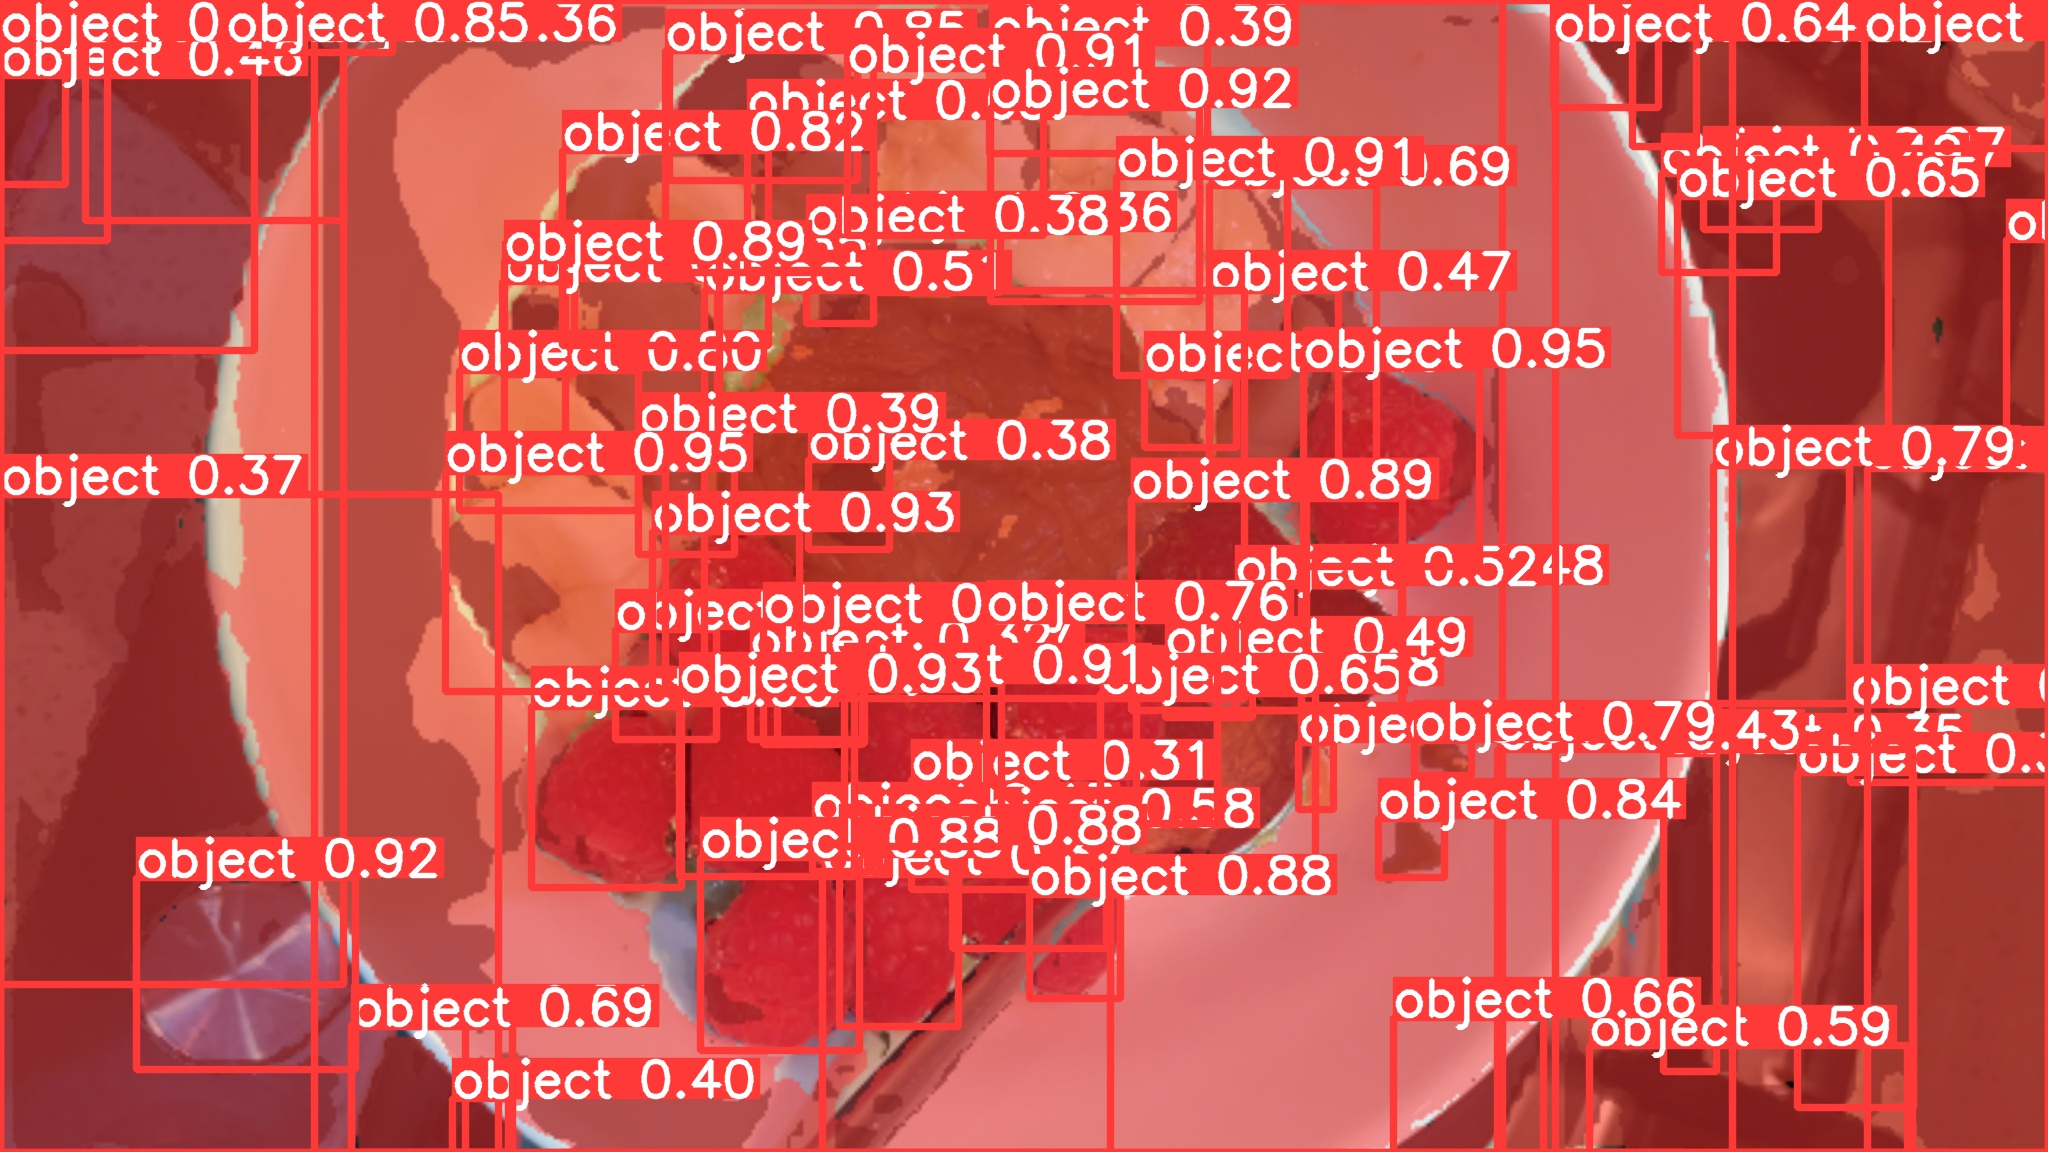

In [16]:
from ultralytics import FastSAM
model = FastSAM('FastSAM-s.pt')
res = model("./food-pics/1.jpeg")
display_model_pred(res[0])

100%|██████████| 38.8M/38.8M [00:02<00:00, 15.9MB/s]



image 1/1 /Users/ismailmohammed/repos/auto-food-diary/notebooks/food-pics/1.jpeg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 1 61, 1 62, 1 63, 1 64, 1 65, 1 66, 1 67, 1 68, 1 69, 1 70, 1 71, 1 72, 1 73, 1 74, 1 75, 1 76, 1 77, 1 78, 1 79, 1 80, 1 81, 49862.3ms
Speed: 7.1ms preprocess, 49862.3ms inference, 134.2ms postprocess per image at shape (1, 3, 1024, 1024)


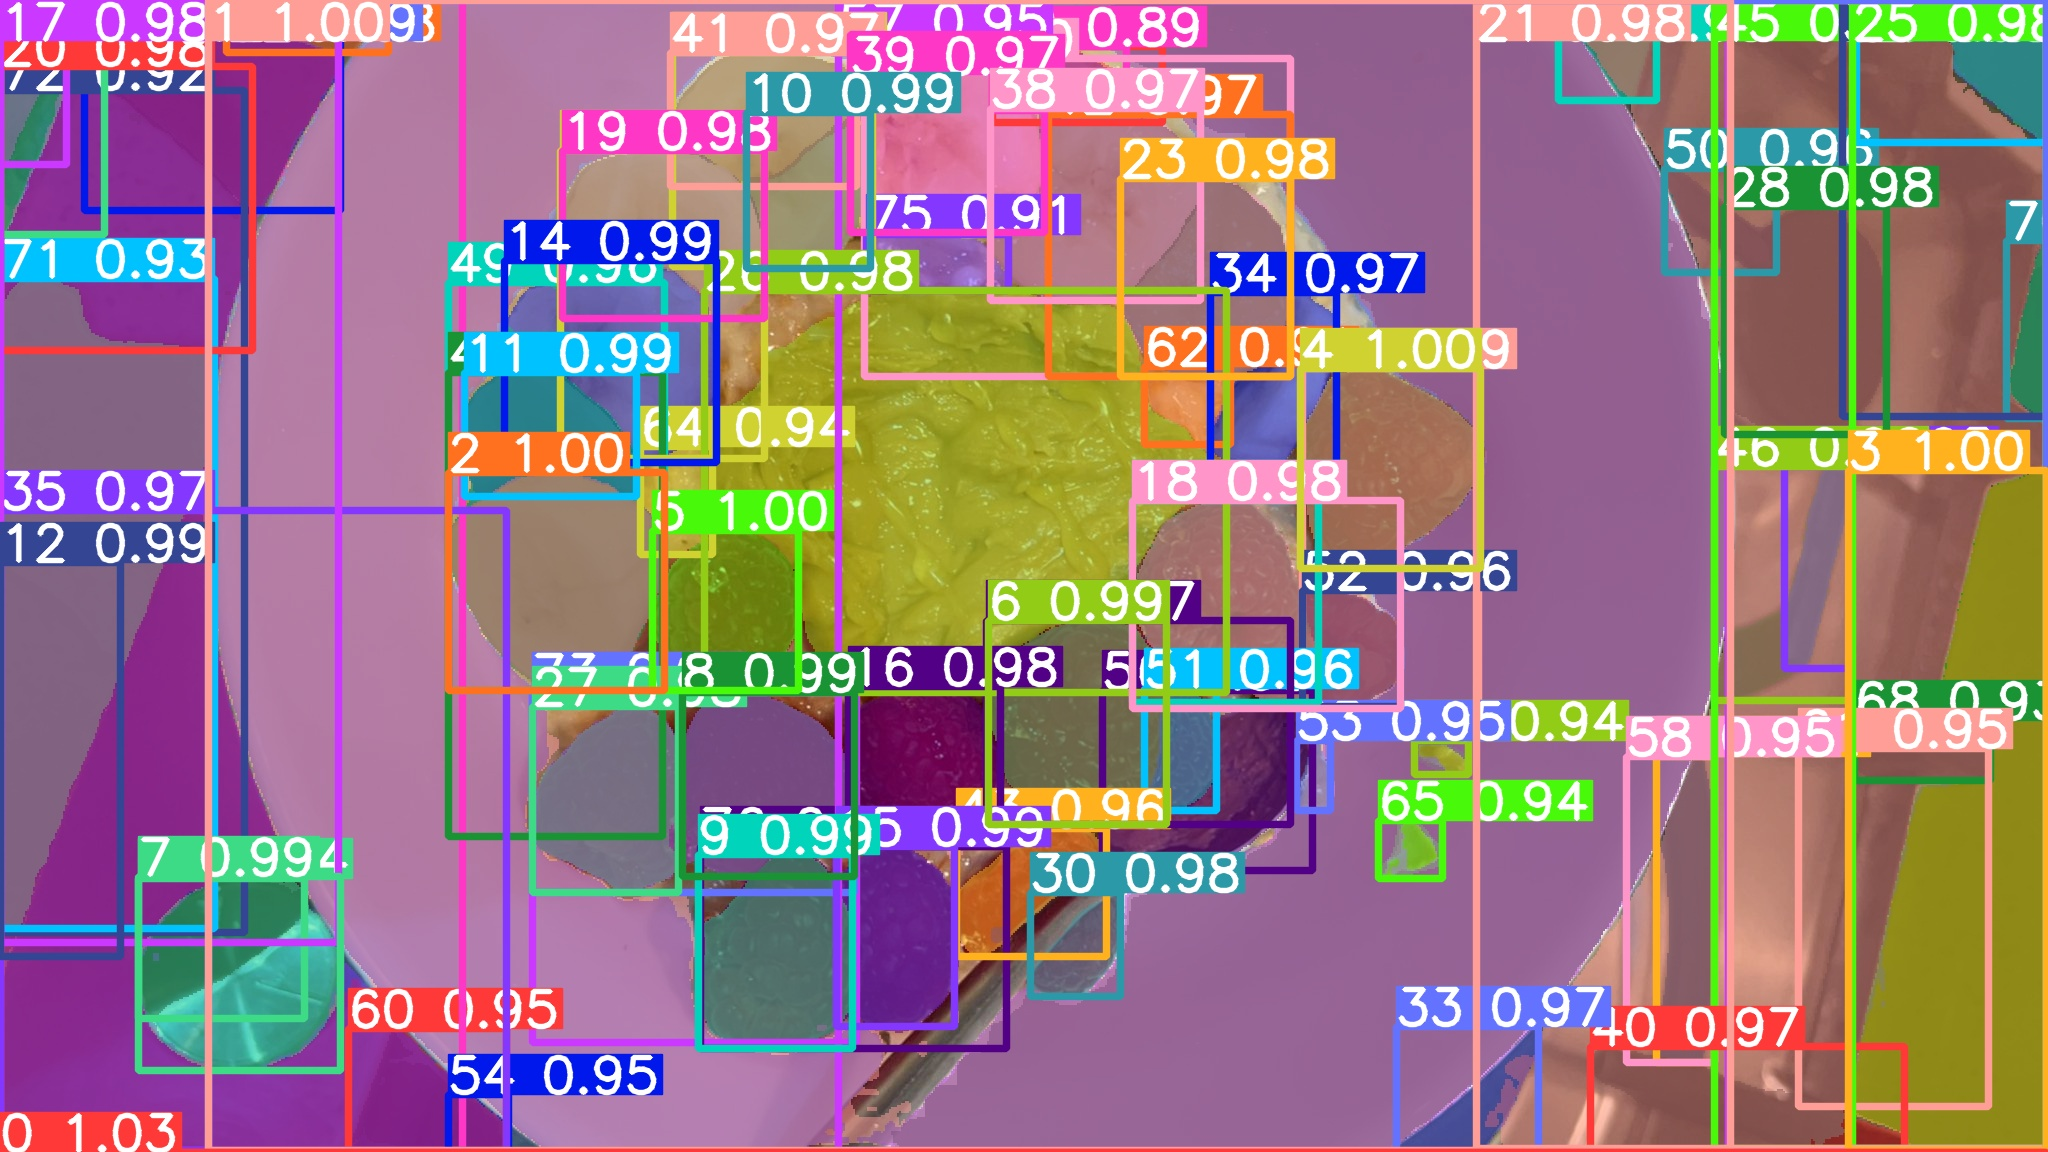

In [17]:
model = SAM('mobile_sam.pt')

res = model("./food-pics/1.jpeg")
display_model_pred(res[0])